Text(0.5, 1.0, 'Harris: Point')

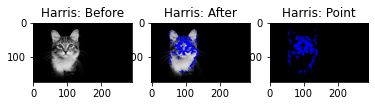

In [33]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cat.jpg')
img1 = cv.imread('cat.jpg')
black = cv.imread('black.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
black[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()
fig = plt.figure()
ax =fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(img1)
ax.set_title('Harris: Before')

ax = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(img)
ax.set_title('Harris: After')

ax = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(black)
ax.set_title('Harris: Point')


Text(0.5, 1.0, 'Shi-Tomashi: Point')

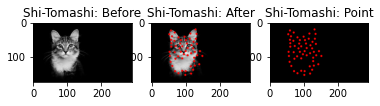

In [30]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
black = cv.imread('black.png')
img = cv.imread('cat.jpg')
img1 = cv.imread('cat.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,500,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
    cv.circle(black,(x,y),3,255,-1)
fig = plt.figure()
ax =fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(img1)
ax.set_title('Shi-Tomashi: Before')

ax = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(img)
ax.set_title('Shi-Tomashi: After')

ax = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(black)
ax.set_title('Shi-Tomashi: Point')

# Harris Corner Detection
- Để xác định được corner, ta lấy tổng các giá trị gradient theo chiều dọc và ngang (x và y) trong vùng đó. 
+ Nếu cả 2 giá trị này đủ lớn khi so với 1 ngưỡng, ta định nghĩa vùng đó là 1 corner.
+ Nếu cả 2 giá trị đều nhỏ hoặc 1 trong 2 giá trị lớn hơn giá trị còn lại thì vùng đang xét là vùng mặt phẳng hoặc vùng cạnh.

# Shi-Tomasi Corner Detection
Shi-Tomasi dựa hoàn toàn vào Harris corner detector nhưng có một thay đổi nhỏ trong cách lựa chọn góc. Đây chính là điểm giúp thuật toán có thể phát hiện vùng có khả năng là góc tốt hơn Harris.
- Đối với Shi-Tomasi, chỉ cần 1 trong 2 giá trị x y (theo chiều ngang và dọc) đồng thời lớn hơn ngưỡng xác định thì góc đó được xem là vùng chứa góc.
- Vùng chứa góc của Shi-Tomasi lớn hơn nhiều so với Harris ~ Vùng góc của Shi-Tomasi được mở rộng hơn.

# Kết quả
- Các corner từ Harris nhận diện gần nhau và chồng lên nhau -> bị lem, không rõ ràng phần góc cạnh của vật thể. Ngược lại, corner từ Shi-Tomasi rõ ràng hơn, thể hiện tổng quát khung sườn tạo nên vật thể hơn.
- Tùy loại ảnh mà 1 trong 2 thuật toán cho kết quả tốt hơn.
